**BreastCancer Prediction using ML**
** **
MALIGNANT OR BEINGIN

In [120]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

**Data Collection and PreProcessing**

In [121]:
breast_cancer_dataset = pd.read_csv('breast-cancer.csv')
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Handeling Missing data

In [122]:
print(breast_cancer_dataset['diagnosis'].unique())
breast_cancer_dataset.isnull().sum()
breast_cancer_dataset['diagnosis']= breast_cancer_dataset['diagnosis'].map({'M':1, 'B':0})
breast_cancer_dataset


['M' 'B']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Seperating X and Y**

In [123]:
y = breast_cancer_dataset['diagnosis']
x = breast_cancer_dataset
x= x.drop('diagnosis', axis = 1)
id = x['id']
x = x.drop('id', axis= 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Normalizing The Data**
** **
scale = range(0,1)

In [124]:
df = np.array([x])
min_df = np.min(df)
max_df = np.max(df)
normalized_df = (df-min_df)/(max_df-min_df)
print(normalized_df)
x_new = normalized_df
y_new = y

[[[4.22896098e-03 2.44005642e-03 2.88669488e-02 ... 6.23883404e-05
   1.08157029e-04 2.79501646e-05]
  [4.83544899e-03 4.17724495e-03 3.12411848e-02 ... 4.37235543e-05
   6.46450400e-05 2.09261871e-05]
  [4.62858486e-03 4.99529854e-03 3.05594734e-02 ... 5.71227080e-05
   8.49318289e-05 2.05876822e-05]
  ...
  [3.90220969e-03 6.60084626e-03 2.54583921e-02 ... 3.33333333e-05
   5.21391631e-05 1.83826986e-05]
  [4.84250118e-03 6.89468735e-03 3.29337094e-02 ... 6.22943112e-05
   9.60742830e-05 2.91490362e-05]
  [1.82416549e-03 5.76868829e-03 1.12646921e-02 ... 0.00000000e+00
   6.74894217e-05 1.65467795e-05]]]


**Seperating Train and test data**

In [125]:
#reshaping
x_new = x_new.reshape(569,30)
print(x_new.shape)
print(y_new.shape)

(569, 30)
(569,)


In [126]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,train_size=0.8,random_state=100)

In [127]:
x_train

array([[3.06770099e-03, 4.53925717e-03, 1.94193700e-02, ...,
        2.61165961e-06, 5.73342736e-05, 1.47837330e-05],
       [3.02773860e-03, 6.79830748e-03, 1.93935120e-02, ...,
        1.52632816e-05, 5.57592854e-05, 1.70239774e-05],
       [3.70239774e-03, 4.51810061e-03, 2.51763047e-02, ...,
        5.01880583e-05, 9.97884344e-05, 2.46826516e-05],
       ...,
       [2.74094969e-03, 4.01269394e-03, 1.73248707e-02, ...,
        1.00188058e-05, 6.41984015e-05, 1.60437236e-05],
       [3.02303714e-03, 4.23131171e-03, 1.95557123e-02, ...,
        1.86318759e-05, 6.53267513e-05, 1.86130701e-05],
       [2.18500235e-03, 3.26751293e-03, 1.40949694e-02, ...,
        1.70709920e-05, 8.65303244e-05, 2.11142454e-05]])

In [128]:
y_train

58     0
554    0
351    1
136    0
497    0
      ..
526    0
53     1
350    0
79     0
520    0
Name: diagnosis, Length: 455, dtype: int64

In [129]:
x_test

array([[4.21015515e-03, 4.94123178e-03, 2.92430654e-02, ...,
        4.61683122e-05, 7.62811472e-05, 2.81617301e-05],
       [3.37094499e-03, 3.16643159e-03, 2.17465914e-02, ...,
        2.55524213e-05, 7.19793136e-05, 1.42736248e-05],
       [4.73906911e-03, 4.62153268e-03, 3.08180536e-02, ...,
        3.34978843e-05, 7.18147626e-05, 1.39468735e-05],
       ...,
       [3.06299953e-03, 4.33004231e-03, 1.94193700e-02, ...,
        1.17842031e-05, 4.67089798e-05, 1.45016455e-05],
       [4.29007992e-03, 4.69675599e-03, 2.81147156e-02, ...,
        4.54160790e-05, 7.20028209e-05, 1.96708980e-05],
       [2.31476258e-03, 3.68594264e-03, 1.48095910e-02, ...,
        1.53455571e-05, 5.88152327e-05, 2.16478608e-05]])

In [130]:
y_test

400    1
225    0
321    1
173    0
506    0
      ..
359    0
261    1
37     0
6      1
524    0
Name: diagnosis, Length: 114, dtype: int64

**Model Building**

**Logistic regression**

In [131]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

**Applying Model to get a Prediction**

In [132]:
lr_model_Prediction_train = lr_model.predict(x_train)
lr_model_Prediction_test  = lr_model.predict(x_test)

In [133]:
#prediction Probablity
y_prob = lr_model.predict_proba(x_test)[:, 1]

# Adjust threshold (e.g., to 0.4)
threshold = 0.4
y_pred_threshold = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))

[[62  3]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        65
           1       0.93      0.88      0.91        49

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [134]:
Data = pd.DataFrame([[lr_model_Prediction_test,lr_model_Prediction_train]],columns= ['test_prediction','train_prediction'])
Data

,test_prediction,train_prediction
0,"[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ..."


**Evaluation Of Model Prediction**
***
using MSE : Mean Square Error

In [135]:
mse_lr_test = mean_squared_error(y_test,lr_model_Prediction_test)
mse_lr_train = mean_squared_error(y_train,lr_model_Prediction_train)

r2_lr_test = r2_score(y_test,lr_model_Prediction_test)
r2_lr_train = r2_score(y_train , lr_model_Prediction_train)

In [136]:
Error = pd.DataFrame([[mse_lr_test,mse_lr_train,r2_lr_test,r2_lr_train]])
Error.columns = ['mse_test','mse_train','r2_test','r2_train']
Error

,mse_test,mse_train,r2_test,r2_train
0,0.149123,0.131868,0.391523,0.426422


In [137]:
Accuracy_train =accuracy_score(y_train , lr_model_Prediction_train)
Accuracy_test = accuracy_score(y_test, lr_model_Prediction_test)
print('Accuracy of training data :',Accuracy_train)
print('Accurcy of test data :',Accuracy_test)

Accuracy of training data : 0.8681318681318682
Accurcy of test data : 0.8508771929824561


*Here we can see it's good*
***
**Data Visualization of predicted model**

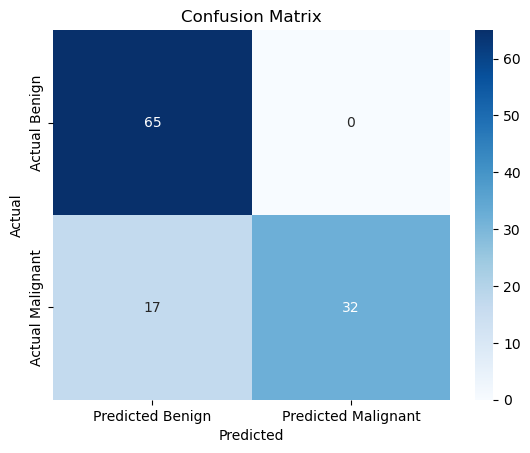

In [138]:
cm = confusion_matrix(y_test, lr_model_Prediction_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Benign', 'Predicted Malignant'], yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Creating Predictive Model**

In [141]:
input_data_set = [0.00894,0.00516,0.0608,0.495,0.0056,0.0134,0.0146,0.0070,0.0117,0.0036,0.0540,0.0447,0.0043,0.0760,0.0001,0.0021,0.0024,0.0005,0.0012,0.0000,0.0126,0.0086,0.0910,1.0000,0.0078,0.0328,0.0350,0.0129,0.0227,0.0056]
input_data_set = np.array([input_data_set])
input_prediction = lr_model.predict(input_data_set)

In [142]:
#creating interface
if input_prediction > 0 :
    print('The tissue is cancerous ' + 'Malignant')
else  :
    print('Non Cancerous Tissue ' + 'Beingin')

The tissue is cancerous Malignant
